<a href="https://colab.research.google.com/github/w21280485/assignment_a2_2/blob/main/Code_Development_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load the Dataset

In [136]:
# Import libraries and Load the Dataset

import sqlite3
import pandas as pd

In [137]:
# Establish the connection to the database

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

In [138]:
# Inspect the database schema and find out what tables exist

sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()

[('medical_examination',)]

In [139]:
# Load the table into Pandas dataframe

sql='''
SELECT * from medical_examination;
'''
df = pd.read_sql_query(sql, connection)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Data Exploration

In [140]:
# Display the first few rows of the dataset using head()

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [141]:
# Display the bottom few rows of the dataset using tail()

df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [142]:
# Get general information about the dataset using info()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [143]:
# Summary statistics of numerical columns using describle()

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Discussion

Above statistics indicate that the max value of gender is 3, which is not the same in the assignment description. Handling of unknown dataset is required in the follow section.

## Pre-processing and cleaning data

### Check for unknown values

In [167]:
# Display all the rows with gender = 3 using sql

sql='''
SELECT * from medical_examination WHERE gender = 3
'''
df = pd.read_sql_query(sql, connection)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2171,18395,3,159,77.0,140,100,1,1,0,0,1,1
1,2769,17458,3,155,50.0,90,50,1,1,0,0,1,0
2,3898,20376,3,158,58.0,130,80,1,1,0,0,1,0
3,13328,23228,3,156,69.0,140,80,3,1,0,0,1,1
4,36717,18422,3,158,73.0,110,80,1,1,0,0,1,0
5,37141,21977,3,165,80.0,120,80,1,1,0,0,1,0
6,37608,19686,3,165,68.0,120,80,1,1,0,0,1,0
7,37757,21882,3,163,74.0,150,100,2,1,0,0,0,1
8,62308,22536,3,148,86.0,120,80,1,1,0,0,1,0
9,89890,19882,3,169,72.0,130,90,1,1,0,0,1,1


### Discussion

Above result indicate that there are 11 rows with gender = 3. Given that the volume is small compare to total 70000 rows of data, these 11 rows will not be selected when doing data analysis.

We can do it by adding a condiction WHERE gender = 1 OR gender = 2 in the SQL query.


### Check for duplicate rows

In [168]:
# Check for duplicates using duplicated()
sql='''
SELECT * from medical_examination
'''
df = pd.read_sql_query(sql, connection)
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

--> Above result indicate that there are no duplicate rows for the first few rows and bottom few rows, but the middle rows cannot be seen. So I try to display the duplicate rows to make sure if no duplicate.

In [169]:
# Try to display duplicate rows

df[df.duplicated()]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [170]:
# Try to display duplicate rows for subsets to cross-check the dataset

df[df.duplicated(subset=["age", "gender", "height", "weight", 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke','alco', 'active', 'cardio'])]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,15094,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,31110,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,54977,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,60642,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,63776,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,64445,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,65352,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,65438,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,69842,21945,1,165,60.0,120,80,1,1,0,0,1,0


### Discussion

Above result indicate that there are duplicate rows for the subsets excluding 'id', which make sense that all the ids are unique and there are some individuals having same values in other columns.

As such, checking duplicate process is done and no need to remove any duplicate values

### Check for missing values

In [171]:
# Check for missing values using isnull()

df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [172]:
# Check for missing values in each row

(df[df['id'].isnull()])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


### Discussion

Above result indicate there are no missing value. As such, checking for missing value is done and no need to handle (remove or impute) missing value.

##Data Analysis

###Import libraries and dataset

In [185]:
# import libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# creating connection to database and cursor

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

# load table into dataframe as we already know the schema via data exploration process.
# !!only select gender = 1 OR 2 to exclude unknown gender!!
sql='''
SELECT * from medical_examination WHERE gender = 1 OR gender = 2;
'''
df = pd.read_sql_query(sql, connection)

### Replace values to meaningful labels

In [186]:
df['cardio'].replace(to_replace=[0,1], value=['No','Yes'], inplace=True)
df['gender'].replace(to_replace=[1,2,3], value=['Female','Male','Unknown'], inplace=True)
df['cholesterol'].replace(to_replace=[1,2,3], value=['Normal','Above normal', 'Well above normal'], inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168,62.0,110,80,Normal,1,0,0,1,No
1,1,20228,Female,156,85.0,140,90,Well above normal,1,0,0,1,Yes
2,2,18857,Female,165,64.0,130,70,Well above normal,1,0,0,0,Yes
3,3,17623,Male,169,82.0,150,100,Normal,1,0,0,1,Yes
4,4,17474,Female,156,56.0,100,60,Normal,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69984,99993,19240,Male,168,76.0,120,80,Normal,1,1,0,1,No
69985,99995,22601,Female,158,126.0,140,90,Above normal,2,0,0,1,Yes
69986,99996,19066,Male,183,105.0,180,90,Well above normal,1,0,1,0,Yes
69987,99998,22431,Female,163,72.0,135,80,Normal,2,0,0,0,Yes


### Data Analysis 1: Investigating Cardiovascular Health by Gender

####  Distribution of cardio diseases within each gender category

In [187]:
# Calculate the count of cardio diseases among all genders to understand cardio distribution
cardio_counts = df['cardio'].value_counts()

# Display the resulting DataFrame
cardio_counts

No     35014
Yes    34975
Name: cardio, dtype: int64

In [188]:
# Calculate the count of cardio diseases by gender to understand gender distribution
gender_counts = df['gender'].value_counts()

# Display the resulting DataFrame
gender_counts

Female    45522
Male      24467
Name: gender, dtype: int64

In [189]:
# Group the data by Cardio and Gender
grouped_data = df.groupby(['gender','cardio'])
grouped_data

# Calculate the count for each group
cardio_gender_counts = grouped_data.size()

# Display the resulting DataFrame
cardio_gender_counts

gender  cardio
Female  No        22909
        Yes       22613
Male    No        12105
        Yes       12362
dtype: int64

In [190]:
# Reshape the result to have cardio as rows and gender as columns
cardio_gender_counts = cardio_gender_counts.unstack()

# Display the resulting DataFrame
cardio_gender_counts

cardio,No,Yes
gender,,
Female,22909,22613
Male,12105,12362


####Visualising the distribution

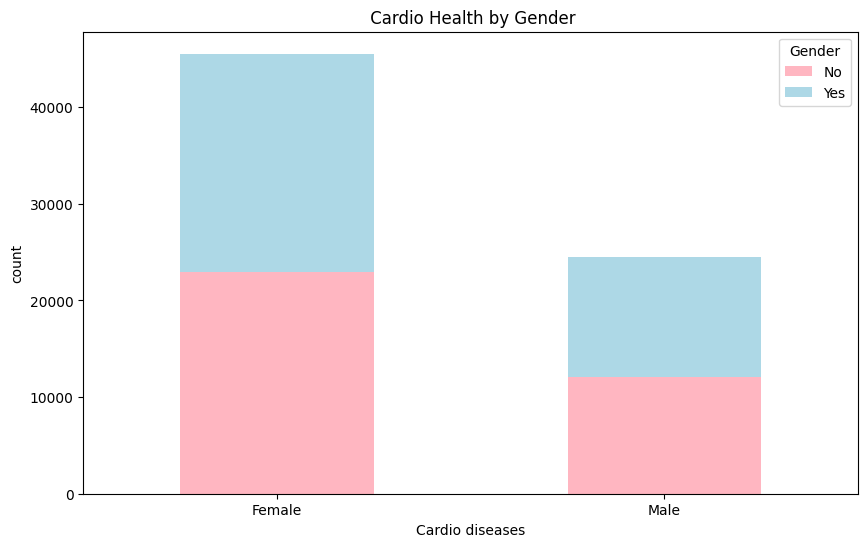

In [191]:
# Create a stacked bar chart
cardio_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=('lightpink','lightblue'))
plt.title(' Cardio Health by Gender')
plt.xlabel('Cardio diseases')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Display the plot
plt.show()


###Data Analysis 2: Investigating Cardiovascular Health by BMI

## Reference

Below website is used for searching how to check duplicate in subset columns:

https://www.w3schools.com/python/pandas/ref_df_duplicated.asp


Below website is used for searching how to replace value in columns:

https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
